In [204]:
import numpy as np
import gymnasium as gym
import matplotlib.pyplot as plt

In [224]:
env = gym.make('CartPole-v1')
weights = np.random.rand(5)
num_episodes = 100000
epsilon = 0.1
alpha = 0.01
gamma = 0.99
lambda_reg = 0.001  # Regularization strength
weight_history = []
print(weights)

[0.77902977 0.77750331 0.2172097  0.60282061 0.50313933]


In [222]:
# Define feature extraction function (identity in this case)
def extract_features(state):
    return np.array([1, state[0], state[1], state[2], state[3]])  # Add bias term as the first feature

# Initialize weights (5 weights for 4 features + 1 bias term)
weights = np.random.rand(5)

# Value function approximation
def value_function(state, weights):
    features = extract_features(state)
    return np.dot(features, weights)

# Epsilon-greedy policy
def epsilon_greedy_policy(state, epsilon=0.1):
    if np.random.rand() < epsilon:
        return env.action_space.sample()  # Exploration
    else:
        return 0 if value_function(state, weights) < 0 else 1  # Exploitation (assuming binary action space)

# Generate an episode
def generate_episode(env, policy, epsilon=0.1):
    episode = []
    state = env.reset()[0]
    done = False
    while not done:
        action = policy(state, epsilon)
        next_state, reward, done, _, _ = env.step(action)
        episode.append((state, action, reward))
        state = next_state
    return episode

# Update weights using Monte Carlo method with L2 regularization
def update_weights(episode, weights, alpha=0.01, gamma=0.99, lambda_reg=0.001):
    G = 0
    for t in reversed(range(len(episode))):
        state, action, reward = episode[t]
        G = gamma * G + reward
        features = extract_features(state)
        weights += alpha * (G - np.dot(features, weights)) * features
        weights -= alpha * lambda_reg * weights  # L2 regularization
    return weights

In [225]:
# Set learning rate decay
alpha_decay = alpha / num_episodes

# Epsilon decay
epsilon_decay = epsilon / num_episodes

for episode in range(num_episodes):
    ep = generate_episode(env, epsilon_greedy_policy, epsilon)
    weights = update_weights(ep, weights, alpha, gamma, lambda_reg)
    weight_history.append(weights.copy())
    if episode % 100 == 0:
        initial_state = env.reset()[0]
        # Decay learning rate and epsilon
        alpha -= alpha_decay
        epsilon -= epsilon_decay
        print(f"Episode {episode}, Estimated Value of Initial State: {value_function(initial_state, weights)}")
        print(f"the weights are:", weights)

Episode 0, Estimated Value of Initial State: 1.1033672089612128
the weights are: [1.09026413 0.7732741  0.36075751 0.58120971 0.25957569]
Episode 100, Estimated Value of Initial State: 8.852550057379657
the weights are: [ 8.81467887  0.50479584 -0.66787716  1.12138227  2.19687779]
Episode 200, Estimated Value of Initial State: 9.066587121315319
the weights are: [ 9.04809533  0.44465307 -0.99223088  1.29897669  2.84026093]
Episode 300, Estimated Value of Initial State: 9.017947158844791
the weights are: [ 9.11008773  0.43759487 -0.88804924  1.45354901  2.89914232]
Episode 400, Estimated Value of Initial State: 9.163702627598807
the weights are: [ 9.25514697  0.42222585 -0.69715052  1.54023493  2.77728426]
Episode 500, Estimated Value of Initial State: 8.836566577551796
the weights are: [ 8.97230037  0.42511525 -0.61107128  1.6630837   2.79314197]
Episode 600, Estimated Value of Initial State: 9.269090281072947
the weights are: [ 9.14458803  0.38708278 -0.60337512  1.80427563  2.93071123

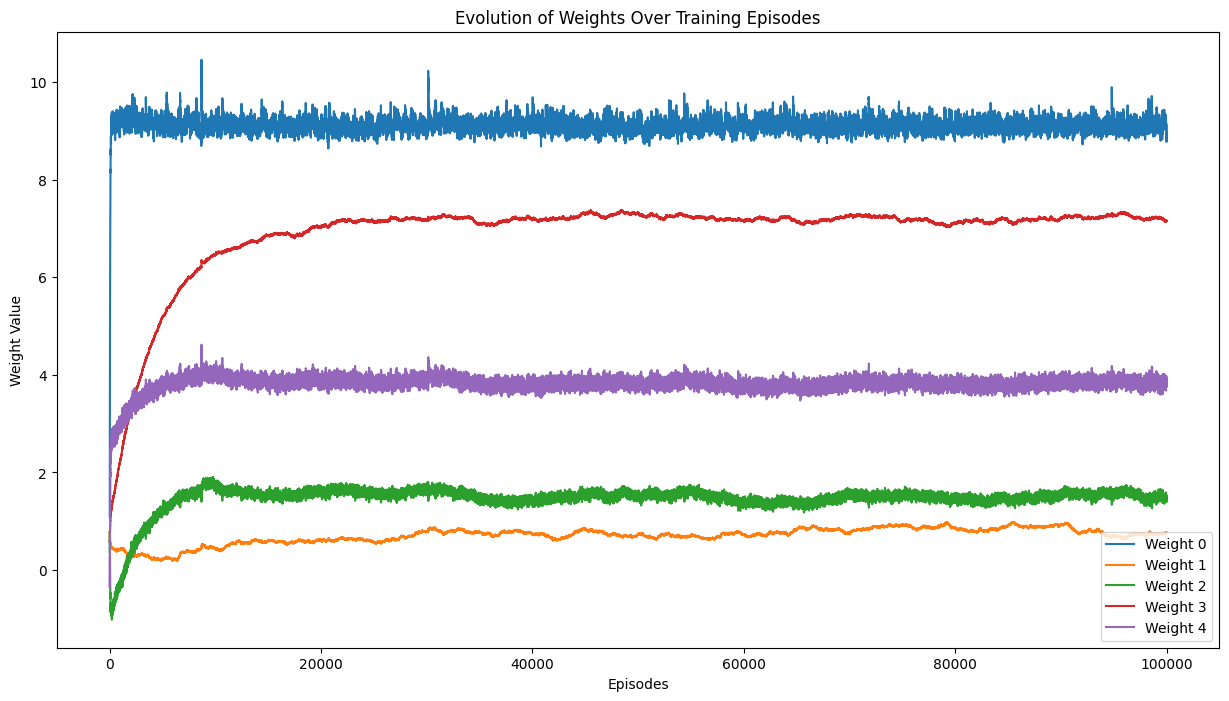

In [226]:
# Plotting the weight evolution
weight_history = np.array(weight_history)
plt.figure(figsize=(15, 8))
for i in range(weight_history.shape[1]):
    plt.plot(weight_history[:, i], label=f'Weight {i}')
plt.xlabel('Episodes')
plt.ylabel('Weight Value')
plt.title('Evolution of Weights Over Training Episodes')
plt.legend()
plt.show()

In [228]:
# You can now use the learned weights to make decisions in the environment
env = gym.make('CartPole-v1', render_mode = "human")




In [227]:
weights

array([8.87506108, 0.76424305, 1.48725064, 7.15412674, 3.82139401])

In [240]:
state = env.reset()[0]
done = False
while not done:
    action = epsilon_greedy_policy(state, epsilon=0.0)  # Exploitation only
    next_state, reward, done, _, _ = env.step(action)
    env.render()
    state = next_state

In [1]:
env.close()

NameError: name 'env' is not defined